In [1]:
import lsst.daf.butler as dafButler
import lsst.afw.detection as afwDetect
import lsst.afw.math as afwMath
from lsst.ip.isr.isrTask import IsrTask
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits
import os

In [2]:
butler = dafButler.Butler('/repo/main', collections=['LSSTComCam/raw/all',
                                                     'LSSTComCam/calib',
                                                     'LSSTComCam/calib/u/plazas/2021NOV11.2'],
                          instrument='LSSTComCam')

In [3]:
isrConfig = IsrTask.ConfigClass()
isrConfig.doLinearize = False
isrConfig.doBias = True
isrConfig.doFlat = False
isrConfig.doDark = False
isrConfig.doFringe = False
isrConfig.doDefect = False
isrConfig.doWrite = False
isrConfig.doApplyGains = True

isrTask = IsrTask(config=isrConfig)

In [4]:
def detectObjectsInExp(exp, nSigma=10, nPixMin=10, grow=0):
    """Return the footPrintSet for the objects in a postISR exposure."""
    median = np.nanmedian(exp.image.array)
    exp.image -= median

    threshold = afwDetect.Threshold(nSigma, afwDetect.Threshold.STDEV)
    footPrintSet = afwDetect.FootprintSet(exp.getMaskedImage(), threshold, "DETECTED", nPixMin)
    if grow > 0:
        isotropic = True
        footPrintSet = afwDetect.FootprintSet(footPrintSet, grow, isotropic)

    exp.image += median  # add back in to leave background unchanged
    return footPrintSet

In [5]:
# seqnum=134
for seqnum in range(134,146):
    for ccd in range(9):
        dataId = {'day_obs': 20211118, 'seq_num': seqnum, 'detector': ccd}
        raw = butler.get('raw', dataId)
        bias = butler.get('bias', dataId)
        postIsr = isrTask.run(raw, bias=bias).exposure

        fpSet = detectObjectsInExp(postIsr, nPixMin=20)
        footprints = fpSet.getFootprints()

        nTracks = len(footprints)
        print(f'Writing {nTracks} tracks to cosmicFits2/{seqnum}')

        for srcNum, footprint in enumerate(footprints):
            flux = footprint.getArea
            box = footprint.getBBox()
            cutout = postIsr[box]
            flux = np.sum(cutout.image.array)
            width, height = box.getDimensions()
            aspect_ratio = max(width/height, height/width)  # whichever is longest
            # print(f'{srcNum}: area={footprint.getArea()}, aspect:{aspect_ratio:.1f}, flux={flux:.1f}')
            name = f'cosmicFits2/{seqnum}/{ccd}_{box.beginX}_{box.beginY}.fits'
            # print('Writing to:', name)
            if not os.path.exists(f'cosmicFits2/{seqnum}'):
                os.makedirs(f'cosmicFits2/{seqnum}')
            if not os.path.exists(name):
                fits.HDUList([fits.PrimaryHDU(),fits.ImageHDU(cutout.image.array)]).writeto(name)

Writing 77 tracks to cosmicFits2/134


Writing 94 tracks to cosmicFits2/134


Writing 87 tracks to cosmicFits2/134


Writing 74 tracks to cosmicFits2/134


Writing 81 tracks to cosmicFits2/134


Writing 90 tracks to cosmicFits2/134


Writing 72 tracks to cosmicFits2/134


Writing 78 tracks to cosmicFits2/134


Writing 76 tracks to cosmicFits2/134


Writing 77 tracks to cosmicFits2/135


Writing 84 tracks to cosmicFits2/135


Writing 95 tracks to cosmicFits2/135


Writing 77 tracks to cosmicFits2/135


Writing 67 tracks to cosmicFits2/135


Writing 76 tracks to cosmicFits2/135


Writing 73 tracks to cosmicFits2/135


Writing 78 tracks to cosmicFits2/135


Writing 57 tracks to cosmicFits2/135


Writing 79 tracks to cosmicFits2/136


Writing 88 tracks to cosmicFits2/136


Writing 82 tracks to cosmicFits2/136


Writing 66 tracks to cosmicFits2/136


Writing 80 tracks to cosmicFits2/136


Writing 67 tracks to cosmicFits2/136


Writing 74 tracks to cosmicFits2/136


Writing 68 tracks to cosmicFits2/136


Writing 61 tracks to cosmicFits2/136


Writing 89 tracks to cosmicFits2/137


Writing 82 tracks to cosmicFits2/137


Writing 77 tracks to cosmicFits2/137


Writing 62 tracks to cosmicFits2/137


Writing 73 tracks to cosmicFits2/137


Writing 48 tracks to cosmicFits2/137


Writing 80 tracks to cosmicFits2/137


Writing 79 tracks to cosmicFits2/137


Writing 81 tracks to cosmicFits2/137


Writing 89 tracks to cosmicFits2/138


Writing 79 tracks to cosmicFits2/138


Writing 72 tracks to cosmicFits2/138


Writing 73 tracks to cosmicFits2/138


Writing 80 tracks to cosmicFits2/138


Writing 76 tracks to cosmicFits2/138


Writing 64 tracks to cosmicFits2/138


Writing 87 tracks to cosmicFits2/138


Writing 72 tracks to cosmicFits2/138


Writing 96 tracks to cosmicFits2/139


Writing 77 tracks to cosmicFits2/139


Writing 87 tracks to cosmicFits2/139


Writing 86 tracks to cosmicFits2/139


Writing 82 tracks to cosmicFits2/139


Writing 80 tracks to cosmicFits2/139


Writing 78 tracks to cosmicFits2/139


Writing 67 tracks to cosmicFits2/139


Writing 72 tracks to cosmicFits2/139


Writing 81 tracks to cosmicFits2/140


Writing 93 tracks to cosmicFits2/140


Writing 91 tracks to cosmicFits2/140


Writing 75 tracks to cosmicFits2/140


Writing 71 tracks to cosmicFits2/140


Writing 73 tracks to cosmicFits2/140


Writing 62 tracks to cosmicFits2/140


Writing 70 tracks to cosmicFits2/140


Writing 53 tracks to cosmicFits2/140


Writing 76 tracks to cosmicFits2/141


Writing 81 tracks to cosmicFits2/141


Writing 96 tracks to cosmicFits2/141


Writing 74 tracks to cosmicFits2/141


Writing 59 tracks to cosmicFits2/141


Writing 79 tracks to cosmicFits2/141


Writing 77 tracks to cosmicFits2/141


Writing 59 tracks to cosmicFits2/141


Writing 93 tracks to cosmicFits2/141


Writing 87 tracks to cosmicFits2/142


Writing 85 tracks to cosmicFits2/142


Writing 84 tracks to cosmicFits2/142


Writing 66 tracks to cosmicFits2/142


Writing 90 tracks to cosmicFits2/142


Writing 75 tracks to cosmicFits2/142


Writing 77 tracks to cosmicFits2/142


Writing 69 tracks to cosmicFits2/142


Writing 63 tracks to cosmicFits2/142


Writing 81 tracks to cosmicFits2/143


Writing 87 tracks to cosmicFits2/143


Writing 80 tracks to cosmicFits2/143


Writing 54 tracks to cosmicFits2/143


Writing 76 tracks to cosmicFits2/143


Writing 76 tracks to cosmicFits2/143


Writing 83 tracks to cosmicFits2/143


Writing 93 tracks to cosmicFits2/143


Writing 74 tracks to cosmicFits2/143


Writing 97 tracks to cosmicFits2/144


Writing 95 tracks to cosmicFits2/144


Writing 67 tracks to cosmicFits2/144


Writing 81 tracks to cosmicFits2/144


Writing 71 tracks to cosmicFits2/144


Writing 67 tracks to cosmicFits2/144


Writing 71 tracks to cosmicFits2/144


Writing 90 tracks to cosmicFits2/144


Writing 78 tracks to cosmicFits2/144


Writing 64 tracks to cosmicFits2/145


Writing 75 tracks to cosmicFits2/145


Writing 77 tracks to cosmicFits2/145


Writing 81 tracks to cosmicFits2/145


Writing 74 tracks to cosmicFits2/145


Writing 71 tracks to cosmicFits2/145


Writing 82 tracks to cosmicFits2/145


Writing 84 tracks to cosmicFits2/145


Writing 68 tracks to cosmicFits2/145


<h3>The rest of this is just testing stuff...</h3>

In [76]:
files = glob('cosmicFits/*/*.fits')
len(files)

9746

In [5]:
raw = butler.get('raw', {'day_obs': 20211118, 'seq_num': 136, 'detector': 0})

for amp in raw.getDetector():
    print(amp.getGain())

1.3517
1.3597
1.3423
1.3337
1.3051
1.3448
1.3557
1.3202
1.4009
1.4343
1.4329
1.4228
1.3028
1.2945
1.3809
1.4009


In [6]:
dataId = {'day_obs': 20211118, 'seq_num': 134, 'detector': 1}
raw = butler.get('raw', dataId)
bias = butler.get('bias', dataId)
postIsr = isrTask.run(raw, bias=bias).exposure

fpSet = detectObjectsInExp(postIsr, nPixMin=20)
footprints = fpSet.getFootprints()

In [71]:
for srcNum, footprint in enumerate(footprints):
    flux = footprint.getArea
    box = footprint.getBBox()
    cutout = postIsr[box]
    flux = np.sum(cutout.image.array)
    width, height = box.getDimensions()
    aspect_ratio = max(width/height, height/width)  # whichever is longest
    # print(f'{srcNum}: area={footprint.getArea()}, aspect:{aspect_ratio:.1f}, flux={flux:.1f}')
    name = f'cosmicFits/{seqnum}/{amp}_{box.beginX}_{box.beginY}.fits'
    print('Writing to:', name)
    if not os.path.exists(f'cosmicFits/{seqnum}'):
        os.makedirs(f'cosmicFits/{seqnum}')
    # fits.HDUList([fits.PrimaryHDU(),fits.ImageHDU(cutout.image.array)]).writeto(name)

Writing to: cosmicFits/142/9_1136_15.fits
Writing to: cosmicFits/142/9_3680_37.fits
Writing to: cosmicFits/142/9_1486_96.fits
Writing to: cosmicFits/142/9_2415_123.fits
Writing to: cosmicFits/142/9_1948_507.fits
Writing to: cosmicFits/142/9_2113_518.fits
Writing to: cosmicFits/142/9_3758_568.fits
Writing to: cosmicFits/142/9_677_590.fits
Writing to: cosmicFits/142/9_677_590.fits
Writing to: cosmicFits/142/9_3409_612.fits
Writing to: cosmicFits/142/9_211_664.fits
Writing to: cosmicFits/142/9_1841_731.fits
Writing to: cosmicFits/142/9_2747_801.fits
Writing to: cosmicFits/142/9_1_842.fits
Writing to: cosmicFits/142/9_2604_866.fits
Writing to: cosmicFits/142/9_83_953.fits
Writing to: cosmicFits/142/9_3711_1008.fits
Writing to: cosmicFits/142/9_2846_1024.fits
Writing to: cosmicFits/142/9_3449_1120.fits
Writing to: cosmicFits/142/9_4007_1137.fits
Writing to: cosmicFits/142/9_1292_1131.fits
Writing to: cosmicFits/142/9_2761_1249.fits
Writing to: cosmicFits/142/9_2844_1337.fits
Writing to: cos

In [29]:
f = '/lsstdata/offline/instrument/LSSTComCam/storage/2021-11-18/CC_O_20211118_000134-R22S01.fits'
hdul = fits.open(f)
hdul[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   32 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
ORIGIN  = 'LSST DM Header Service' / FITS file originator                       
COMMENT = '        '                                                            
        ---- Date, night and basic image information ----                       
TIMESYS = 'TAI     '           / The time scale used                            
DATE    = '2021-11-18T23:10:45.385' / Creation Date and Time of File            
DATE-OBS= '2021-11-18T23:06:19.730' / Date of the observation (image acquisition
DATE-BEG= '2021-11-18T23:06:

0: 1 area=62, aspect:2.0, flux=28051.7


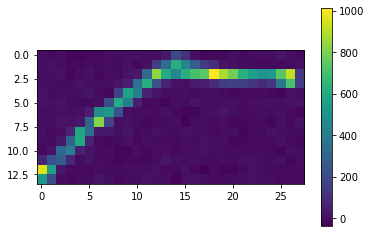

1: 1 area=34, aspect:2.2, flux=28746.4


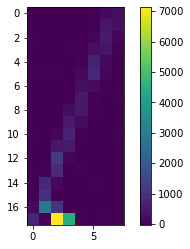

2: 1 area=80, aspect:2.2, flux=62449.0


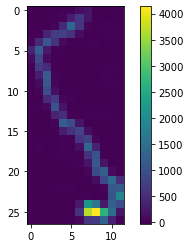

3: 1 area=84, aspect:3.0, flux=41443.5


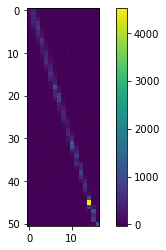

4: 1 area=165, aspect:1.5, flux=75947.5


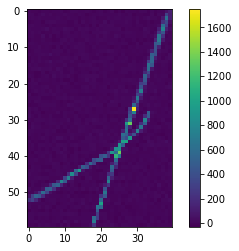

5: 1 area=41, aspect:7.7, flux=20769.9


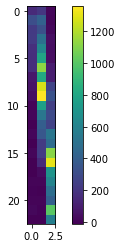

6: 1 area=28, aspect:1.4, flux=14970.8


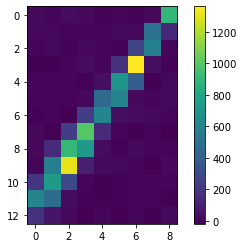

7: 1 area=52, aspect:1.5, flux=32279.4


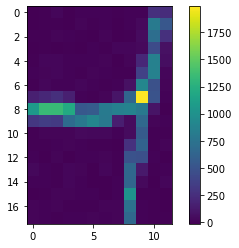

8: 1 area=44, aspect:4.3, flux=19951.5


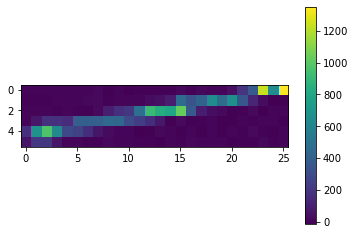

9: 1 area=28, aspect:1.1, flux=16338.2


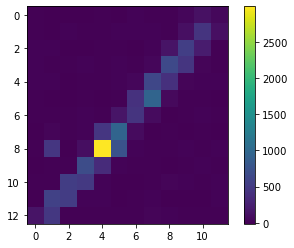

In [15]:
for srcNum, footprint in enumerate(footprints[:10]):
    flux = footprint.getArea
    cutout = postIsr[footprint.getBBox()]
    flux = np.sum(cutout.image.array)
    width, height = footprint.getBBox().getDimensions()
    aspect_ratio = max(width/height, height/width)  # whichever is longest
    print(f'{srcNum}: {1} area={footprint.getArea()}, aspect:{aspect_ratio:.1f}, flux={flux:.1f}')
    plt.imshow(cutout.image.array)
    plt.colorbar()
    plt.show()

In [23]:
ds = butler.registry.queryDatasetTypes()
for d in ds:
    print(d)

DatasetType('skyMap', {skymap}, SkyMap)
DatasetType('raw', {band, instrument, detector, physical_filter, exposure}, Exposure)
DatasetType('camera', {instrument}, Camera, isCalibration=True)
DatasetType('defects', {instrument, detector}, Defects, isCalibration=True)
DatasetType('bfKernel', {instrument}, NumpyArray, isCalibration=True)
DatasetType('transmission_optics', {instrument}, TransmissionCurve, isCalibration=True)
DatasetType('transmission_sensor', {instrument, detector}, TransmissionCurve, isCalibration=True)
DatasetType('transmission_filter', {band, instrument, physical_filter}, TransmissionCurve, isCalibration=True)
DatasetType('transmission_atmosphere', {instrument}, TransmissionCurve, isCalibration=True)
DatasetType('sky', {band, instrument, detector, physical_filter}, ExposureF, isCalibration=True)
DatasetType('bias', {instrument, detector}, ExposureF, isCalibration=True)
DatasetType('flat', {band, instrument, detector, physical_filter}, ExposureF, isCalibration=True)
Datas

In [38]:
ds = butler.registry.queryDatasets('raw', collections=collections)
for d in ds:
    print(d)

In [2]:
butler = dafButler.Butler('/repo/main', instrument='HSC')

In [30]:
collections = butler.registry.queryCollections()

In [32]:
collections = butler.registry.queryCollections()
collections = [c for c in collections if c.find('calib')!=-1 and c.find('HSC')!=-1]

In [14]:
collections = butler.registry.queryCollections()
[c for c in collections if c.find('ashugart')!=-1]

[]

In [34]:
collections

['HSC/calib/DM-28636',
 'HSC/calib/DM-28636/unbounded',
 'HSC/calib/DM-28636/curated/19700101T000000Z',
 'HSC/calib/DM-28636/curated/20130131T000000Z',
 'HSC/calib/DM-28636/curated/20140403T000000Z',
 'HSC/calib/DM-28636/curated/20140601T000000Z',
 'HSC/calib/DM-28636/curated/20151106T000000Z',
 'HSC/calib/DM-28636/curated/20160401T000000Z',
 'HSC/calib/DM-28636/curated/20161122T000000Z',
 'HSC/calib/DM-28636/curated/20161223T000000Z',
 'HSC/calib/unbounded',
 'HSC/calib/gen2/20180117/20170821T000000Z',
 'HSC/calib/gen2/20180117/20160518T000000Z',
 'HSC/calib/gen2/20180117/20170625T000000Z',
 'HSC/calib/gen2/20180117/20150417T000000Z',
 'HSC/calib/gen2/20180117/20150407T000000Z',
 'HSC/calib/gen2/20180117/20160114T000000Z',
 'HSC/calib/gen2/20180117/20170326T000000Z',
 'HSC/calib/gen2/20180117/20160609T000000Z',
 'HSC/calib/gen2/20180117/20141102T000000Z',
 'HSC/calib/gen2/20180117/20170329T000000Z',
 'HSC/calib/gen2/20180117/20150725T000000Z',
 'HSC/calib/gen2/20180117/20160808T000000